In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('kyphosis.csv')

In [5]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [7]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


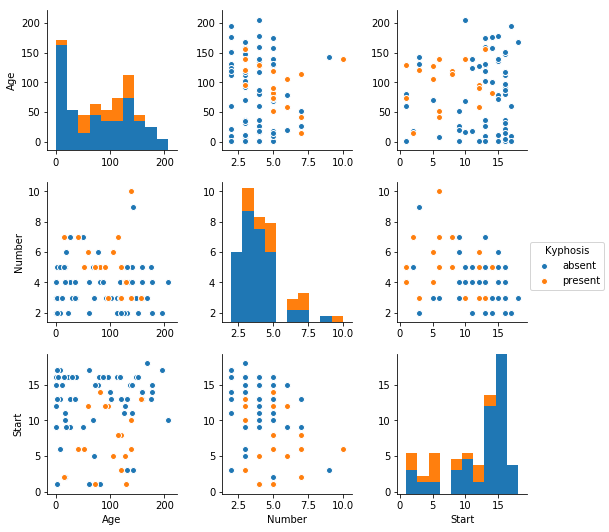

In [8]:
sns.pairplot(data,hue='Kyphosis')

In [9]:
from sklearn.cross_validation import train_test_split

C:\Users\imroy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X = data.drop('Kyphosis',axis=1)
y = data['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h1>Decision Tree Classifier</h1>

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
prediction_DT = DT.predict(X_test)

In [14]:
#Decision Tree Evaluation
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
CM_DT = confusion_matrix(y_test,prediction_DT)
CR_DT = classification_report(y_test,prediction_DT)

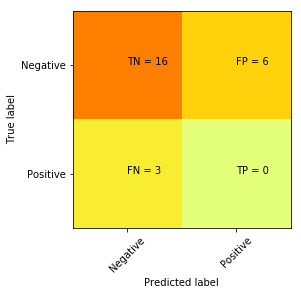


Classification Report:
             precision    recall  f1-score   support

     absent       0.84      0.73      0.78        22
    present       0.00      0.00      0.00         3

avg / total       0.74      0.64      0.69        25



In [16]:
plt.clf()
plt.imshow(CM_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM_DT[i][j]))
plt.show()
print('\nClassification Report:')
print(CR_DT)

<h1> Random Forests Classifer</h1>

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
prediction_RF = RF.predict(X_test)

In [20]:
#Random Forests Evaluation
CM_RF = confusion_matrix(y_test,prediction_RF)
CR_RF = classification_report(y_test,prediction_RF)

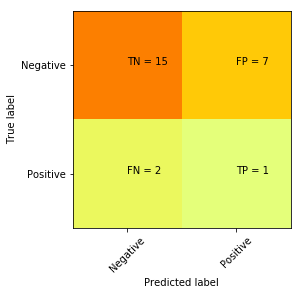


Classification Report:
             precision    recall  f1-score   support

     absent       0.88      0.68      0.77        22
    present       0.12      0.33      0.18         3

avg / total       0.79      0.64      0.70        25



In [21]:
plt.clf()
plt.imshow(CM_RF, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM_RF[i][j]))
plt.show()
print('\nClassification Report:')
print(CR_RF)

<h1> Bagging 

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
BG = BaggingClassifier()

In [24]:
BG.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [25]:
prediction_BG = BG.predict(X_test)

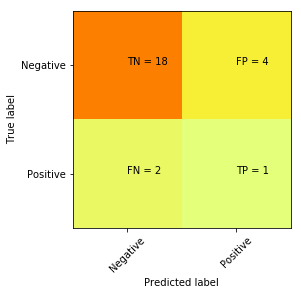


Classification Report:
             precision    recall  f1-score   support

     absent       0.90      0.82      0.86        22
    present       0.20      0.33      0.25         3

avg / total       0.82      0.76      0.78        25



In [26]:
#Bagging Evaluation
CM_BG = confusion_matrix(y_test,prediction_BG)
CR_BG = classification_report(y_test,prediction_BG)

plt.clf()
plt.imshow(CM_BG, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM_BG[i][j]))
plt.show()
print('\nClassification Report:')
print(CR_BG)

<h1> Boosting 


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
BS = GradientBoostingClassifier()

In [29]:
BS.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
prediction_BS = BG.predict(X_test)

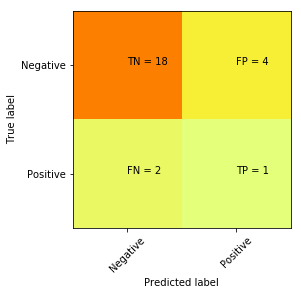


Classification Report:
             precision    recall  f1-score   support

     absent       0.90      0.82      0.86        22
    present       0.20      0.33      0.25         3

avg / total       0.82      0.76      0.78        25



In [31]:
#Gradient Boosting Evaluation
CM_BS = confusion_matrix(y_test,prediction_BS)
CR_BS = classification_report(y_test,prediction_BS)

plt.clf()
plt.imshow(CM_BS, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM_BS[i][j]))
plt.show()
print('\nClassification Report:')
print(CR_BG)